<a href="https://colab.research.google.com/github/ayush-singh110/Zelestra-Hackathon/blob/main/ZF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.pipeline import Pipeline
!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
train=pd.read_csv('train1(2).csv')
train.head()

,Unnamed: 0,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,0,7.817315,576.179270,41.243087,32.135501,4,0.803199,37.403527,1.963787,13.691147,62.494044,12.824912,1018.866505,A1,E00,tracking,0.562096
1,1,1,24.785727,240.003973,1.359648,19.977460,8,0.479456,21.843315,0.241473,27.545096,43.851238,12.012044,1025.623854,D4,E00,dual-axis,0.396447
2,2,2,46.652695,687.612799,91.265368,1.496401,4,0.822398,48.222882,4.191800,43.363708,51.378575,1.814400,1010.922654,C3,E00,tracking,0.573776
3,3,3,53.339567,735.141179,96.190955,18.491582,3,0.837529,46.295748,0.960567,57.720436,67.361473,8.736259,1021.846663,A1,E00,dual-axis,0.629009
4,4,4,5.575374,12.241203,27.495073,30.722697,6,0.551833,0.000000,0.898062,6.786263,3.632000,0.522684,1008.555958,B2,E00,fixed,0.341874


In [ ]:
train.drop('Unnamed: 0',axis=1,inplace=True)
train.drop('id',inplace=True,axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
train.isnull().sum()

,0
temperature,0
irradiance,0
humidity,0
panel_age,0
maintenance_count,0
soiling_ratio,0
voltage,0
current,0
module_temperature,0
cloud_coverage,0


In [ ]:
train.drop('string_id',axis=1,inplace=True)

KeyError: "['string_id'] not found in axis"

In [ ]:
num_features=[feature for feature in train.columns if train[feature].dtype!='O' and feature!='efficiency']
cat_features=[feature for feature in train.columns if train[feature].dtype=='O']

In [ ]:
train.head()

,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,error_code,installation_type,efficiency
0,7.817315,576.179270,41.243087,32.135501,4,0.803199,37.403527,1.963787,13.691147,62.494044,12.824912,1018.866505,E00,tracking,0.562096
1,24.785727,240.003973,1.359648,19.977460,8,0.479456,21.843315,0.241473,27.545096,43.851238,12.012044,1025.623854,E00,dual-axis,0.396447
2,46.652695,687.612799,91.265368,1.496401,4,0.822398,48.222882,4.191800,43.363708,51.378575,1.814400,1010.922654,E00,tracking,0.573776
3,53.339567,735.141179,96.190955,18.491582,3,0.837529,46.295748,0.960567,57.720436,67.361473,8.736259,1021.846663,E00,dual-axis,0.629009
4,5.575374,12.241203,27.495073,30.722697,6,0.551833,0.000000,0.898062,6.786263,3.632000,0.522684,1008.555958,E00,fixed,0.341874


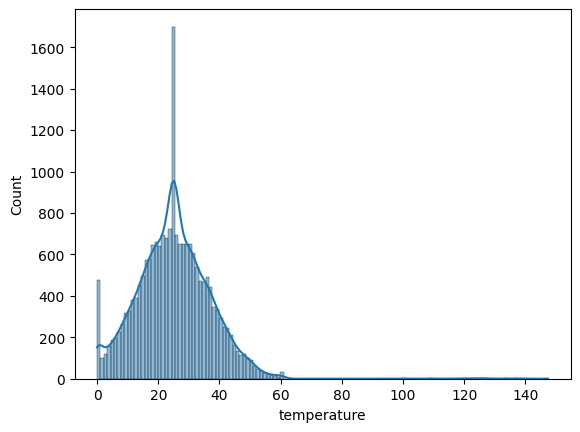

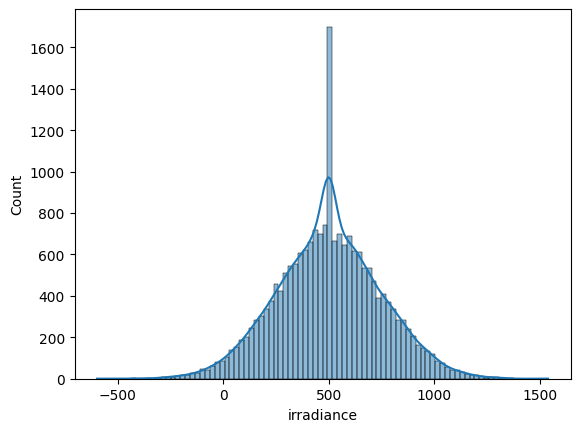

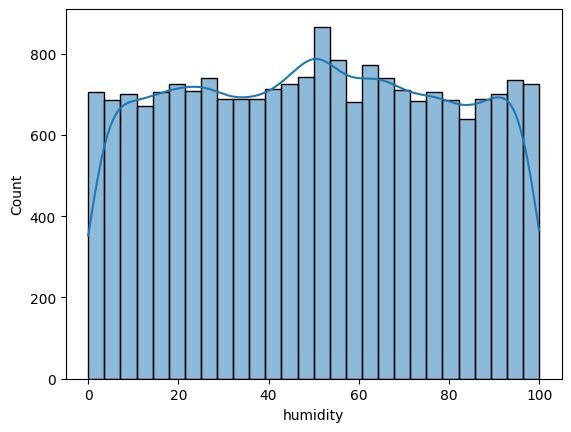

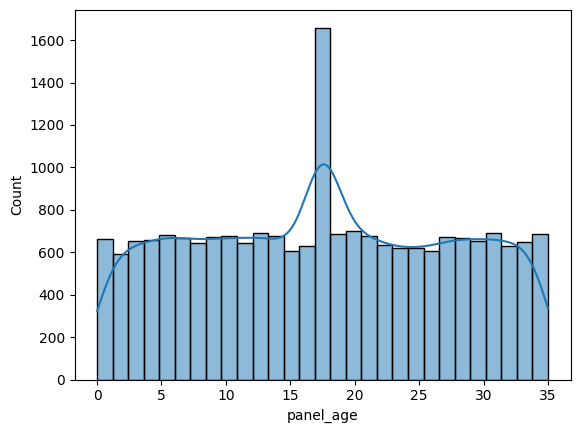

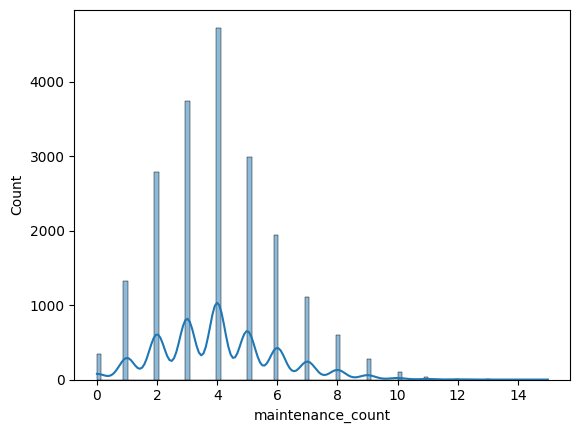

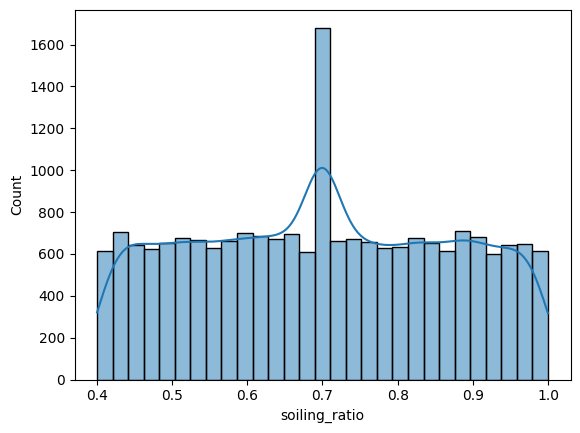

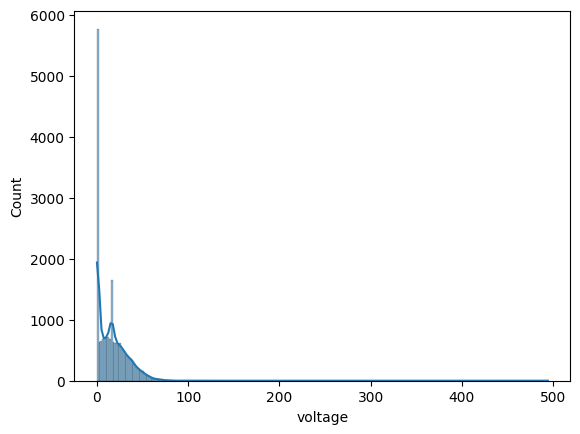

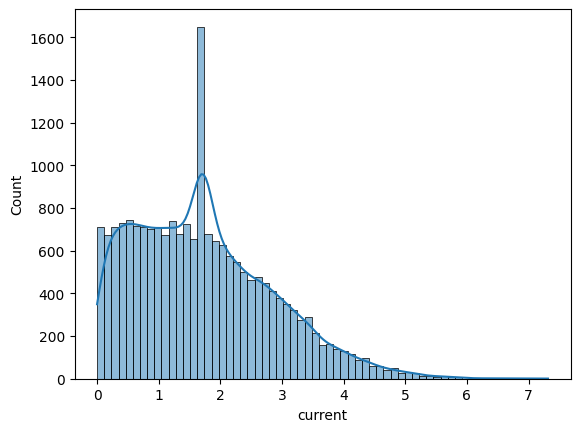

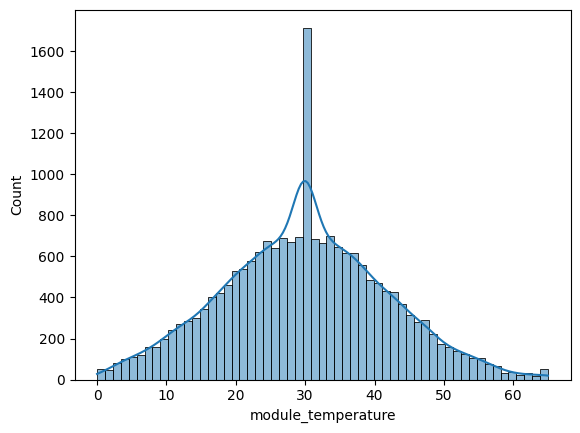

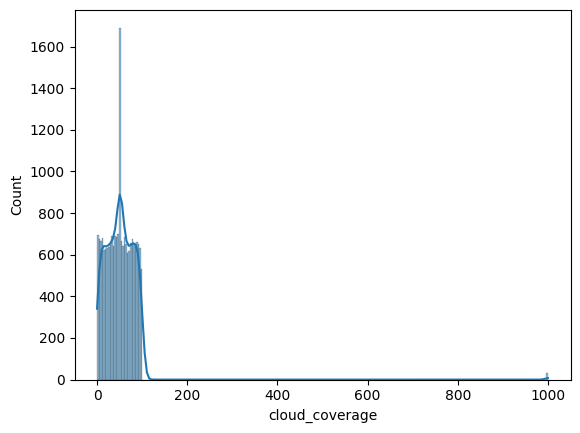

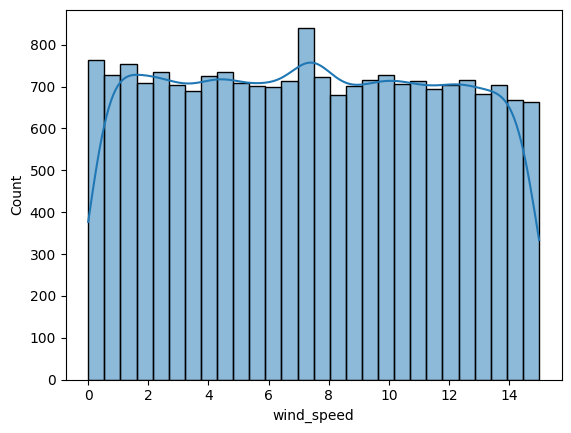

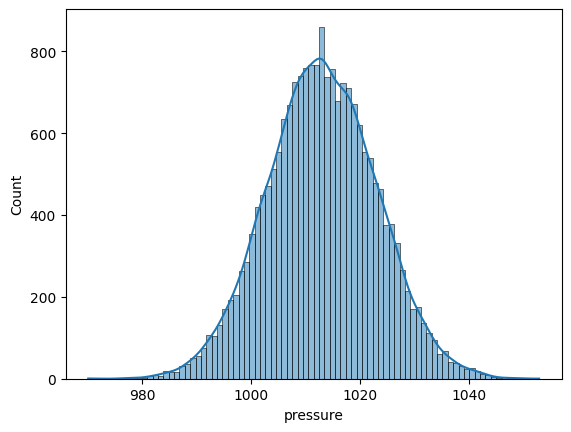

In [ ]:
for i in num_features:
    sns.histplot(data=train,x=i,kde=True)
    plt.show()

In [ ]:
X=train.drop('efficiency',axis=1)
y=train['efficiency']

In [ ]:
scaler=StandardScaler()
encoder=OneHotEncoder(drop='first')
preprocessing=ColumnTransformer(
    [
        ('scaler',scaler,num_features),
        ('encoder',encoder,cat_features)
    ],remainder='passthrough'
)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train=preprocessing.fit_transform(X_train)
X_test=preprocessing.transform(X_test)

In [ ]:
cr=CatBoostRegressor(learning_rate=0.01,loss_function='RMSE')
cr.fit(X_train,y_train,verbose=100)
y_pred=cr.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0:	learn: 0.1391582	total: 17.3ms	remaining: 17.3s
100:	learn: 0.1108217	total: 1.38s	remaining: 12.3s
200:	learn: 0.1039370	total: 1.96s	remaining: 7.78s
300:	learn: 0.1018059	total: 2.37s	remaining: 5.5s
400:	learn: 0.1007854	total: 2.82s	remaining: 4.21s
500:	learn: 0.1001180	total: 3.23s	remaining: 3.22s
600:	learn: 0.0996007	total: 3.66s	remaining: 2.43s
700:	learn: 0.0991302	total: 4.09s	remaining: 1.75s
800:	learn: 0.0986968	total: 4.54s	remaining: 1.13s
900:	learn: 0.0982716	total: 4.93s	remaining: 542ms
999:	learn: 0.0978667	total: 5.32s	remaining: 0us
0.10673081865373049


In [ ]:
test=pd.read_csv('test1.csv')
test.head()

,Unnamed: 0,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type
0,0,0,17.618379,85.449838,90.815423,13.910963,6,0.889765,6.370396,0.069101,19.517274,33.509889,7.181958,1034.782455,C3,E01,tracking
1,1,1,34.826323,722.801748,20.982993,20.916528,4,0.590372,30.095867,1.713852,37.421443,32.327060,4.184582,992.319752,D4,E00,fixed
2,2,2,33.776934,485.491998,55.614050,1.446962,3,0.611425,28.424430,1.696936,32.147763,69.613333,6.259441,999.213457,D4,E01,dual-axis
3,3,3,18.584189,350.022720,49.044766,18.810133,5,0.700468,7.848038,0.787188,25.734118,42.862760,2.769607,1026.650078,C3,E02,dual-axis
4,4,4,43.044908,437.295622,8.761571,17.473594,8,0.564938,12.300717,1.867620,30.038138,51.025763,11.846974,1010.809943,B2,E00,fixed


In [ ]:
test.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)
test.drop('string_id',axis=1,inplace=True)

In [ ]:
test_t=test[X.columns]
test_t=preprocessing.transform(test_t)

In [ ]:
test=pd.read_csv('test1.csv')
final_predictions = cr.predict(test_t)
submission=pd.DataFrame(
    {
        'id':test['id'],
        'efficiency':final_predictions
    }
)
submission.to_csv('submission.csv',index=False)